# Бинарная классификация звезд
## **Цель**: создать бинарный классификатор класса звезды (столбец `present`)
## **Датасет:** `whole_data_practive3.csv`
### <ins>Описание датасета:</ins>
| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| `RAJ2000` | `Right Ascension (J2000)` | `float64` |
| `DEJ2000` | `Declination (J2000)` | `float64` |
| `nobs` | `Number of observations` | `int64` |
| `Vmag` | `V-band magnitude. Brightness of the object as observed visually, by the human eye.` | `float64` |
| `e_Vmag` | `Error in V-band magnitude` | `float64` |
| `Bmag` | `B-band magnitude. Brightness of the object when viewed through a blue filter` | `float64` |
| `e_Bmag` | `Error in B-band magnitude` | `float64` |
| `gpmag` | `Gaia G-band magnitude` | `float64` |
| `e_gpmag` | `Error in Gaia G-band magnitude` | `float64` |
| `rpmag` | `Gaia RP-band magnitude` | `float64` |
| `e_rpmag` | `Error in Gaia RP-band magnitude` | `float64` |
| `ipmag` | `IP-band magnitude` | `float64` |
| `e_ipmag` | `Error in IP-band magnitude` | `float64` |
| `fuv_mag` | `FUV magnitude` | `float64` |
| `nuv_mag` | `NUV magnitude` | `float64` |
| `err` | `-` | `float64` |
| `present` | `star class` | `int64` |
| `type` | `star type (almost NaN everytime on one of the classes)` | `object` |
| `min_mag` | `-` | `float64` |
| `max_mag` | `-` | `float64` |

# Загрузим датасет и удалим лишние признаки
Удаление лишних признаков:
- `type` — у одного из классов он практически всегда имеет значение `NaN`, т.е. практически эквивалентен знанию класса звезды.
- `nobs` — данный признак указывает на кол-во наблюдений данного объекта. Можно попробовать использовать его как степень доверия к данным, однако много объектов имеют примерно одинаковое число наблюдений, поэтому признак решено отбросить.
- `RAJ2000`, `DEJ2000` — это координаты звезды в экваториальной системе на эпоху J2000.0. Сами по себе они не несут информации о физических свойствах звезды, поэтому не могут быть полезными признаками.



In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



PATH_TO_DATA = "/content/whole_data_practice3.csv"

data = pd.read_csv(PATH_TO_DATA)
display(data.info())
display(data.describe())
data = data.drop(columns=[
    "type", # gives information about classes :(
    "nobs", # useless data
    "RAJ2000", "DEJ2000" # coordinates shouldn't depict stars
                         ])
data = data.dropna() # удалим 4 NaN строки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64988 entries, 0 to 64987
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  64988 non-null  float64
 1   DEJ2000  64988 non-null  float64
 2   nobs     64988 non-null  int64  
 3   Vmag     64988 non-null  float64
 4   e_Vmag   64988 non-null  float64
 5   Bmag     64988 non-null  float64
 6   e_Bmag   64988 non-null  float64
 7   gpmag    64988 non-null  float64
 8   e_gpmag  64988 non-null  float64
 9   rpmag    64988 non-null  float64
 10  e_rpmag  64988 non-null  float64
 11  ipmag    64988 non-null  float64
 12  e_ipmag  64988 non-null  float64
 13  fuv_mag  64988 non-null  float64
 14  nuv_mag  64988 non-null  float64
 15  err      64988 non-null  float64
 16  present  64988 non-null  int64  
 17  type     6517 non-null   object 
 18  min_mag  64984 non-null  float64
 19  max_mag  64984 non-null  float64
dtypes: float64(17), int64(2), object(1)
memory usage: 

None

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,min_mag,max_mag
count,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64988.000000,64984.000000,64984.000000
mean,189.900410,5.743908,11.435050,13.051703,0.050753,13.662124,0.057441,13.326147,0.061010,12.894450,0.052636,12.748919,0.089134,22.010904,17.405586,0.172671,0.101311,13.060289,9.788631
std,117.334916,20.524489,34.727653,1.884791,0.053581,1.949798,0.064043,1.902269,0.101006,1.865886,0.068216,1.838006,0.134957,1.792885,1.994318,0.174754,0.301742,1.630775,5.841919
min,0.007155,-53.300726,3.000000,6.122000,0.000000,6.673000,0.000000,6.563000,0.000000,5.741000,0.000000,4.557000,0.000000,11.961000,11.226000,0.000000,0.000000,5.010000,0.001000
25%,117.916037,-3.589013,4.000000,11.656000,0.023000,12.225000,0.025000,11.903000,0.022000,11.517000,0.024000,11.413000,0.031000,21.269000,16.086000,0.087936,0.000000,12.040000,0.740000
50%,168.777423,1.502730,5.000000,12.887000,0.039000,13.434000,0.041000,13.121000,0.036000,12.755000,0.040000,12.646000,0.058000,22.554000,17.098000,0.127098,0.000000,13.220000,12.640000
75%,322.452068,13.339830,7.000000,14.579000,0.063000,15.142250,0.068000,14.826000,0.060000,14.412000,0.064000,14.247000,0.097000,23.283000,18.435000,0.189806,0.000000,14.200000,13.870000
max,359.995160,69.080703,387.000000,17.464000,2.511000,18.640000,1.864000,17.949000,3.579000,17.209000,4.109000,17.762000,2.615000,24.849000,24.624000,4.888841,1.000000,19.600000,20.470000


# Визуализация
Визуализация проводится для всего датасета
# Матрица корреляций. Поиск зависимостей
Построим матрицу корреляций

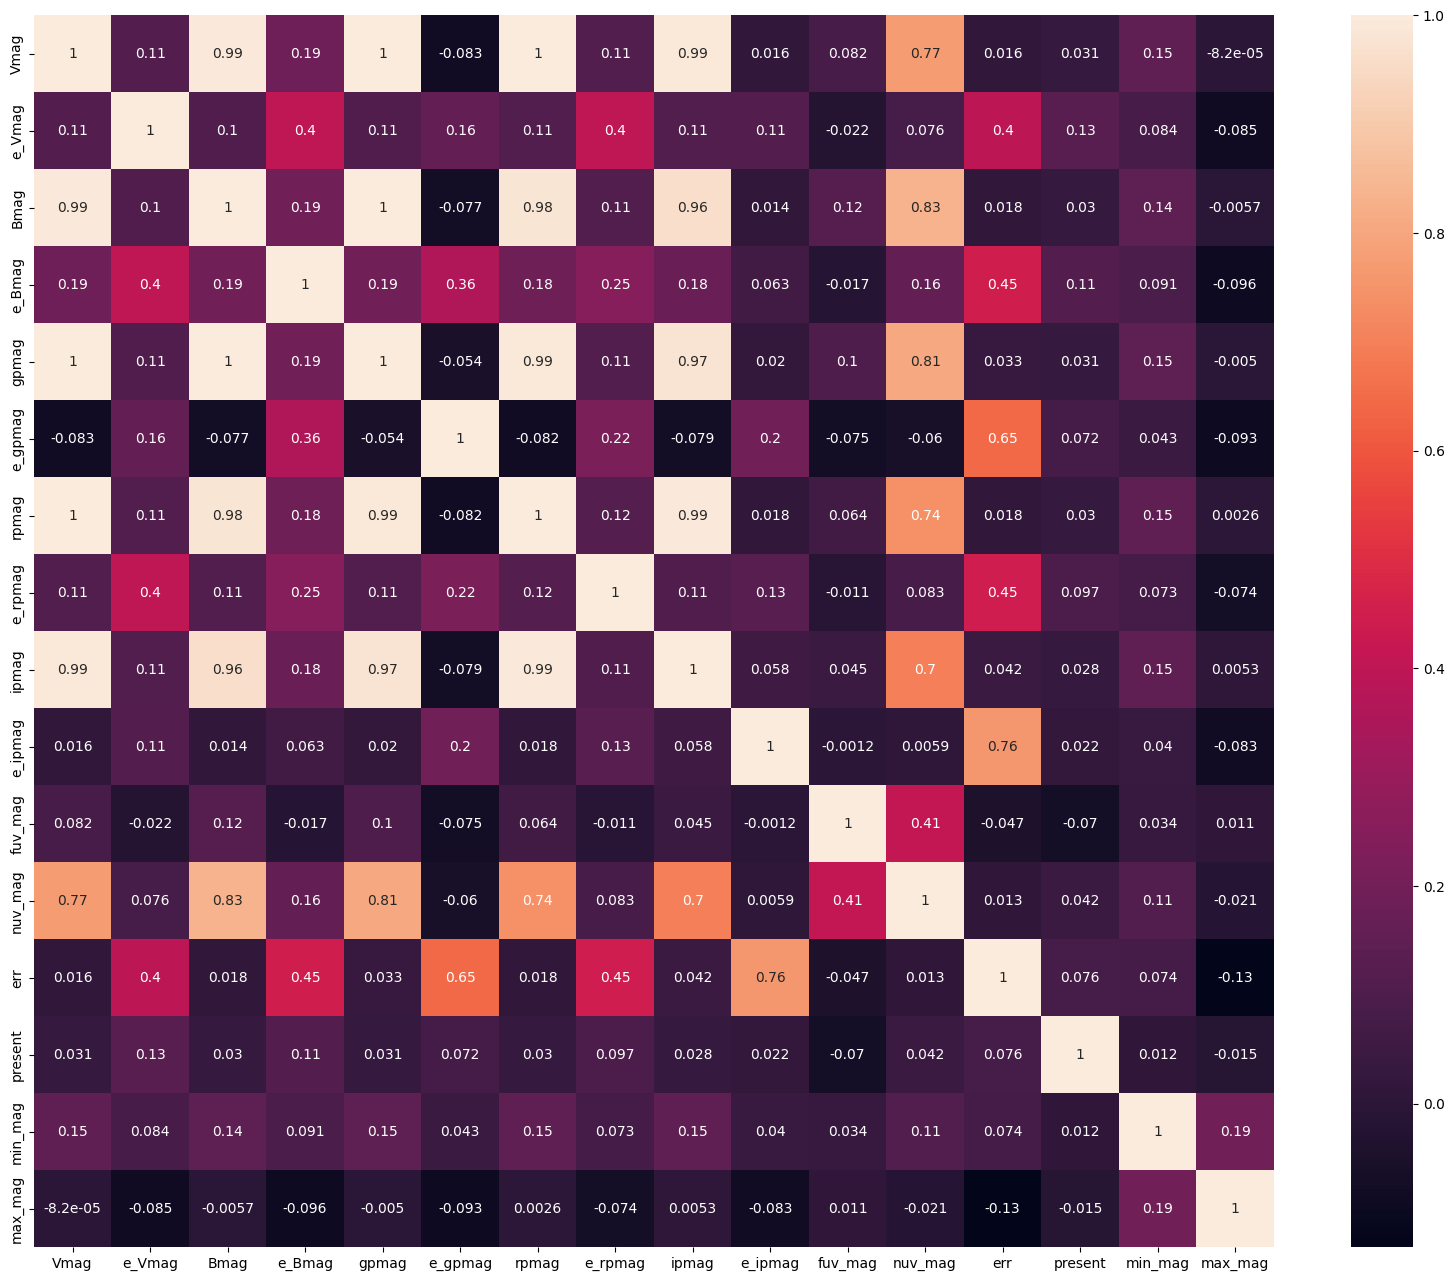

In [ ]:
SIZE = 2 # matrix size

corr_matrix = data.corr()
plt.figure(figsize=(10 * SIZE, 8 * SIZE))

sns.heatmap(corr_matrix, annot = True)
plt.show()

# Вывод
Признаки `Vmag`, `Bmag`, `gpmag`, `rpmag`, `ipmag` сильно скоррелированны. Это дает повод обратить на них внимание. Практика показала, что модели лучше всего обучаются, когда данные признаки смешиваются в один

In [55]:
# Следующие процедуры можно провести на исходном датасете, так как это равносильно тем же преобразованиям на тестовой и обучающей выборках отдельно
# data["B-V"] = data["Bmag"] - data["Vmag"]
# data["GP-RP"] = data["gpmag"] - data["rpmag"]
# data["RP-IP"] = data["rpmag"] - data["ipmag"]
# data["NUV-FUV"] = data["fuv_mag"] - data["nuv_mag"]
data["Corr"] = data[["Vmag", "Bmag", "gpmag", "rpmag", "ipmag"]].sum(axis=1)

data = data.drop(columns=[
    "Vmag", "Bmag", "gpmag", "rpmag", "ipmag",
    "e_Vmag", "e_Bmag", "e_gpmag", "e_rpmag", "e_ipmag", # Не знаю, что с этим делать
    # "err", "max_mag", "min_mag", # мб нужно мб нет
                         ])

# Pairplot. Поиск зависимостей
Построим графики плотностей распределения признаков и их зависимости друг от друга. Заметим интересные зависимости между `RAJ2000` и `DEJ2000`?????, однако поймем, что нигде не наблюдается четкого отделения классов друг от друга. Скорее всего, основной проблемой является дисбаланас классов, с которым мы разберемся позже

In [ ]:
# data_temp = data[["present", "RAJ2000", "DEJ2000"]]
# sns.pairplot(data_temp, hue="present")
# plt.show()
# data_temp = data[["present", "Vmag", "e_Vmag"]]
# sns.pairplot(data_temp, hue="present")
plt.show()
data_temp = data[["present", "Bmag", "e_Bmag"]]
sns.pairplot(data_temp, hue="present")
plt.show()
data_temp = data[["present", "gpmag", "e_gpmag"]]
sns.pairplot(data_temp, hue="present")
plt.show()
data_temp = data[["present", "rpmag", "e_rpmag"]]
sns.pairplot(data_temp, hue="present")
plt.show()
data_temp = data[["present", "ipmag", "e_ipmag"]]
sns.pairplot(data_temp, hue="present")
plt.show()


# Посмотрим на датасет ещё раз

In [56]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 64984 entries, 4 to 64987
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fuv_mag  64984 non-null  float64
 1   nuv_mag  64984 non-null  float64
 2   err      64984 non-null  float64
 3   present  64984 non-null  int64  
 4   min_mag  64984 non-null  float64
 5   max_mag  64984 non-null  float64
 6   Corr     64984 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.0 MB


None

,fuv_mag,nuv_mag,err,present,min_mag,max_mag,Corr
count,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000,64984.000000
mean,22.010826,17.405584,0.172427,0.101317,13.060289,9.788631,65.683327
std,1.792901,1.994348,0.171920,0.301751,1.630775,5.841919,9.392253
min,11.961000,11.226000,0.000000,0.000000,5.010000,0.001000,29.833000
25%,21.269000,16.086000,0.087932,0.000000,12.040000,0.740000,58.723750
50%,22.554000,17.098000,0.127092,0.000000,13.220000,12.640000,64.851000
75%,23.283000,18.435000,0.189799,0.000000,14.200000,13.870000,73.298250
max,24.849000,24.624000,3.639082,1.000000,19.600000,20.470000,86.950000


# Hold-out
Прежде чем применять преобразования, которые могут вызвать Data Leakage, разделим выборку на обучающую и тестовую. Решим проблему дисбаланса классов, применив OverSampling к минорному классу.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["present"]), data["present"], test_size=0.3, random_state=42)

# Поиск аномалий
Посмотрим на отклонения значений признаков и отыщим аномалии
## К сожалению, удаление аномальных значений приводит к ухудшению работы классификатора

In [27]:
import numpy as np

def find_anomalies(X, y, columns):
  to_remove =[]

  for column in columns:
    for label in {0}:
      # print(f"Current column: {column}, label: {label}")

      Q1 = np.percentile(X.loc[y == label][column], 25, axis=0)
      Q3 = np.percentile(X.loc[y == label][column], 75, axis=0)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      column_anomalies = X.loc[y == label].loc[(X[column] < lower_bound) | (X[column] > upper_bound)].index
      to_remove.extend(column_anomalies)

  to_remove = np.unique(to_remove)
  return to_remove

anomalies = find_anomalies(X_train, y_train, ["Corr"])
display(y_train.loc[anomalies].value_counts())
X_train = X_train.drop(anomalies)
y_train = y_train.drop(anomalies)
display(y_train.value_counts())

,count
present,
0,26


,count
present,
0,40805
1,4657


# Scaling
Масштабирование прзинаков для используемых нами алгоритмов (Gradient Boost, Random Forest) практически не имеет смысла, т.к. разделения на деревьях будут те же, просто с другим масштабом. Также примение скэлирование в нашей задаче, к сожалению, не дало лучшего результата

# Oversampling
Решим проблемы дисбаланса классов, добавив синтетические данные в минорный класс.

In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

# Oversampling
smote = ADASYN(random_state=42, sampling_strategy=0.5)

display(data.present.value_counts())
X_train, y_train = smote.fit_resample(X_train, y_train)
display(y_train.value_counts())

,count
present,
0,58400
1,6584


,count
present,
0,40831
1,20170


# Gradient boosting
Для классификации будем использовать градиентный бустинг

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Test data with oversampling

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.,
    max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [60]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

display(confusion_matrix(y_test, y_pred))
display(accuracy_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
display(recall_score(y_test, y_pred))
display(f1_score(y_test, y_pred))

array([[16241,  1328],
       [  325,  1602]])

0.9152133771029954

0.5467576791808874

0.8313440581214323

0.6596664607782582

# Random Forest
Попробуем также использовать случайный лес. Заметим мгновенное улучшение по сравнению с градиентным бустингом.

Возможно данный результат связан с тем, что алгоритм случайного леса начинается с бутстрэпа (bootstrap), который частично решает проблему дисбаланса классов.

Также есть вероятность того, что алгоритм обучился на самом хуже, т.к. стал больше угадывать экземпляры мажорирующего класса. Из-за большого дисбаланса классов плохо обученный алгоритм может показаться хорошим.

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [64]:
display(confusion_matrix(y_test, y_pred))
display(accuracy_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
display(recall_score(y_test, y_pred))
display(f1_score(y_test, y_pred))

array([[16754,   815],
       [  391,  1536]])

0.9381411571604432

0.6533390046788601

0.7970939283860924

0.7180925666199158

# Выводы
Итак, мы удалили признаки, которые никак не связаны с типом звезды

Далее мы добавили новый признак, являющийся суммой скоррелированных признаков. Закомментированными в ячейка с добавлением признаком являются другие попытки найти осмысленные признаки. Однако данные попытки приводили к очень большому ухудшению итоговой модели (F1-Score опускался до 0.5). К таким же плохим результатам приводила попытка борьбы с аномалиями, несмотря на то, что удалялись аномалии только в мажорирующем классе, чтобы хоть как-то снзиить дизбаланс

Для борьбы с дисбалансом был применён Oversampling, потому что Undersampling показал себя хуже.

После этого были обучены две модели, лучшей из которых оказался случайный лес, получивший `F1-Score: 0.7180925666199158`.

#

# 